# Numpy: acelerando operações sobre vetores

## Comparações: escrita e acesso

### Velocidade de escrita

O código a seguir gera 100 milhões de valores aleatórios entre 0 e 1 usando a biblioteca `random` do próprio Python. Os valores são guardados em uma lista.

In [1]:
SIZE = 100000000

In [2]:
from random import random

values = list()
for i in range(SIZE):
    values.append(random())

O mesmo é feito a seguir, usando o inicializador rand da biblioteca `numpy`

In [3]:
import numpy as np

values_np = np.random.rand(SIZE)

### Velocidade de acesso

As coisas pioram ainda mais quando estamos avaliando a velocidade de acesso a esses dados. Listas em Python não são otimizadas para armazenar os valores próximos um dos outros, logo, todo acesso feito é mais lento que o acesso feito a um _array_ do _NumPy_.

Por exemplo, calculando a soma de todos os valores gerados aleatoriamente.

In [4]:
sum = 0.
for v in values:
    sum += v
print(sum)

50005951.77384263


In [5]:
sum_np = np.sum(values_np)
print(sum_np)

50001189.2463073


E se quisermos tirar a mediana?

O código abaixo literalmente <span style="color:red">não roda no Notebook da Rub</span>. Tente, se quiser.

In [6]:
# values.sort()
# median = values[SIZE//2]

Numpy

In [7]:
median = np.median(values_np)
print(median)

0.5000390256075664


(O que faz sentido, pois estamos usando  uma distribuição uniforme entre 0 e 1)

Em suma, por operações sobre vetores, matrizes e outros tensores (generalização para dimensões superiores) serem muito lentas em Python, o _NumPy_ forma a base de todas as outras bibliotecas que fazem operações sobre essas estruturas. Talvez no caso do Camp isso não faça muita diferença, devido ao volume reduzido de dados (no mundo real, 100 milhões de valores é um número pequeno), mas, para fazer uso das funcionalidades, é necessário conhecer essa base.

# Scipy: um canivete suíço

A biblioteca Scipy pode ser usada para
- Tratamento de sinais
- Transformada de Fourier
- Resolução de equações diferenciais
- Álgebra linear
- Interpolação polinomial
- Estatística

dentre outras funcionalidades.

No nosso caso, iremos usar a mesma para gerar diferentes distribuições.

In [8]:
import scipy as sp
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## Distribuição uniforme

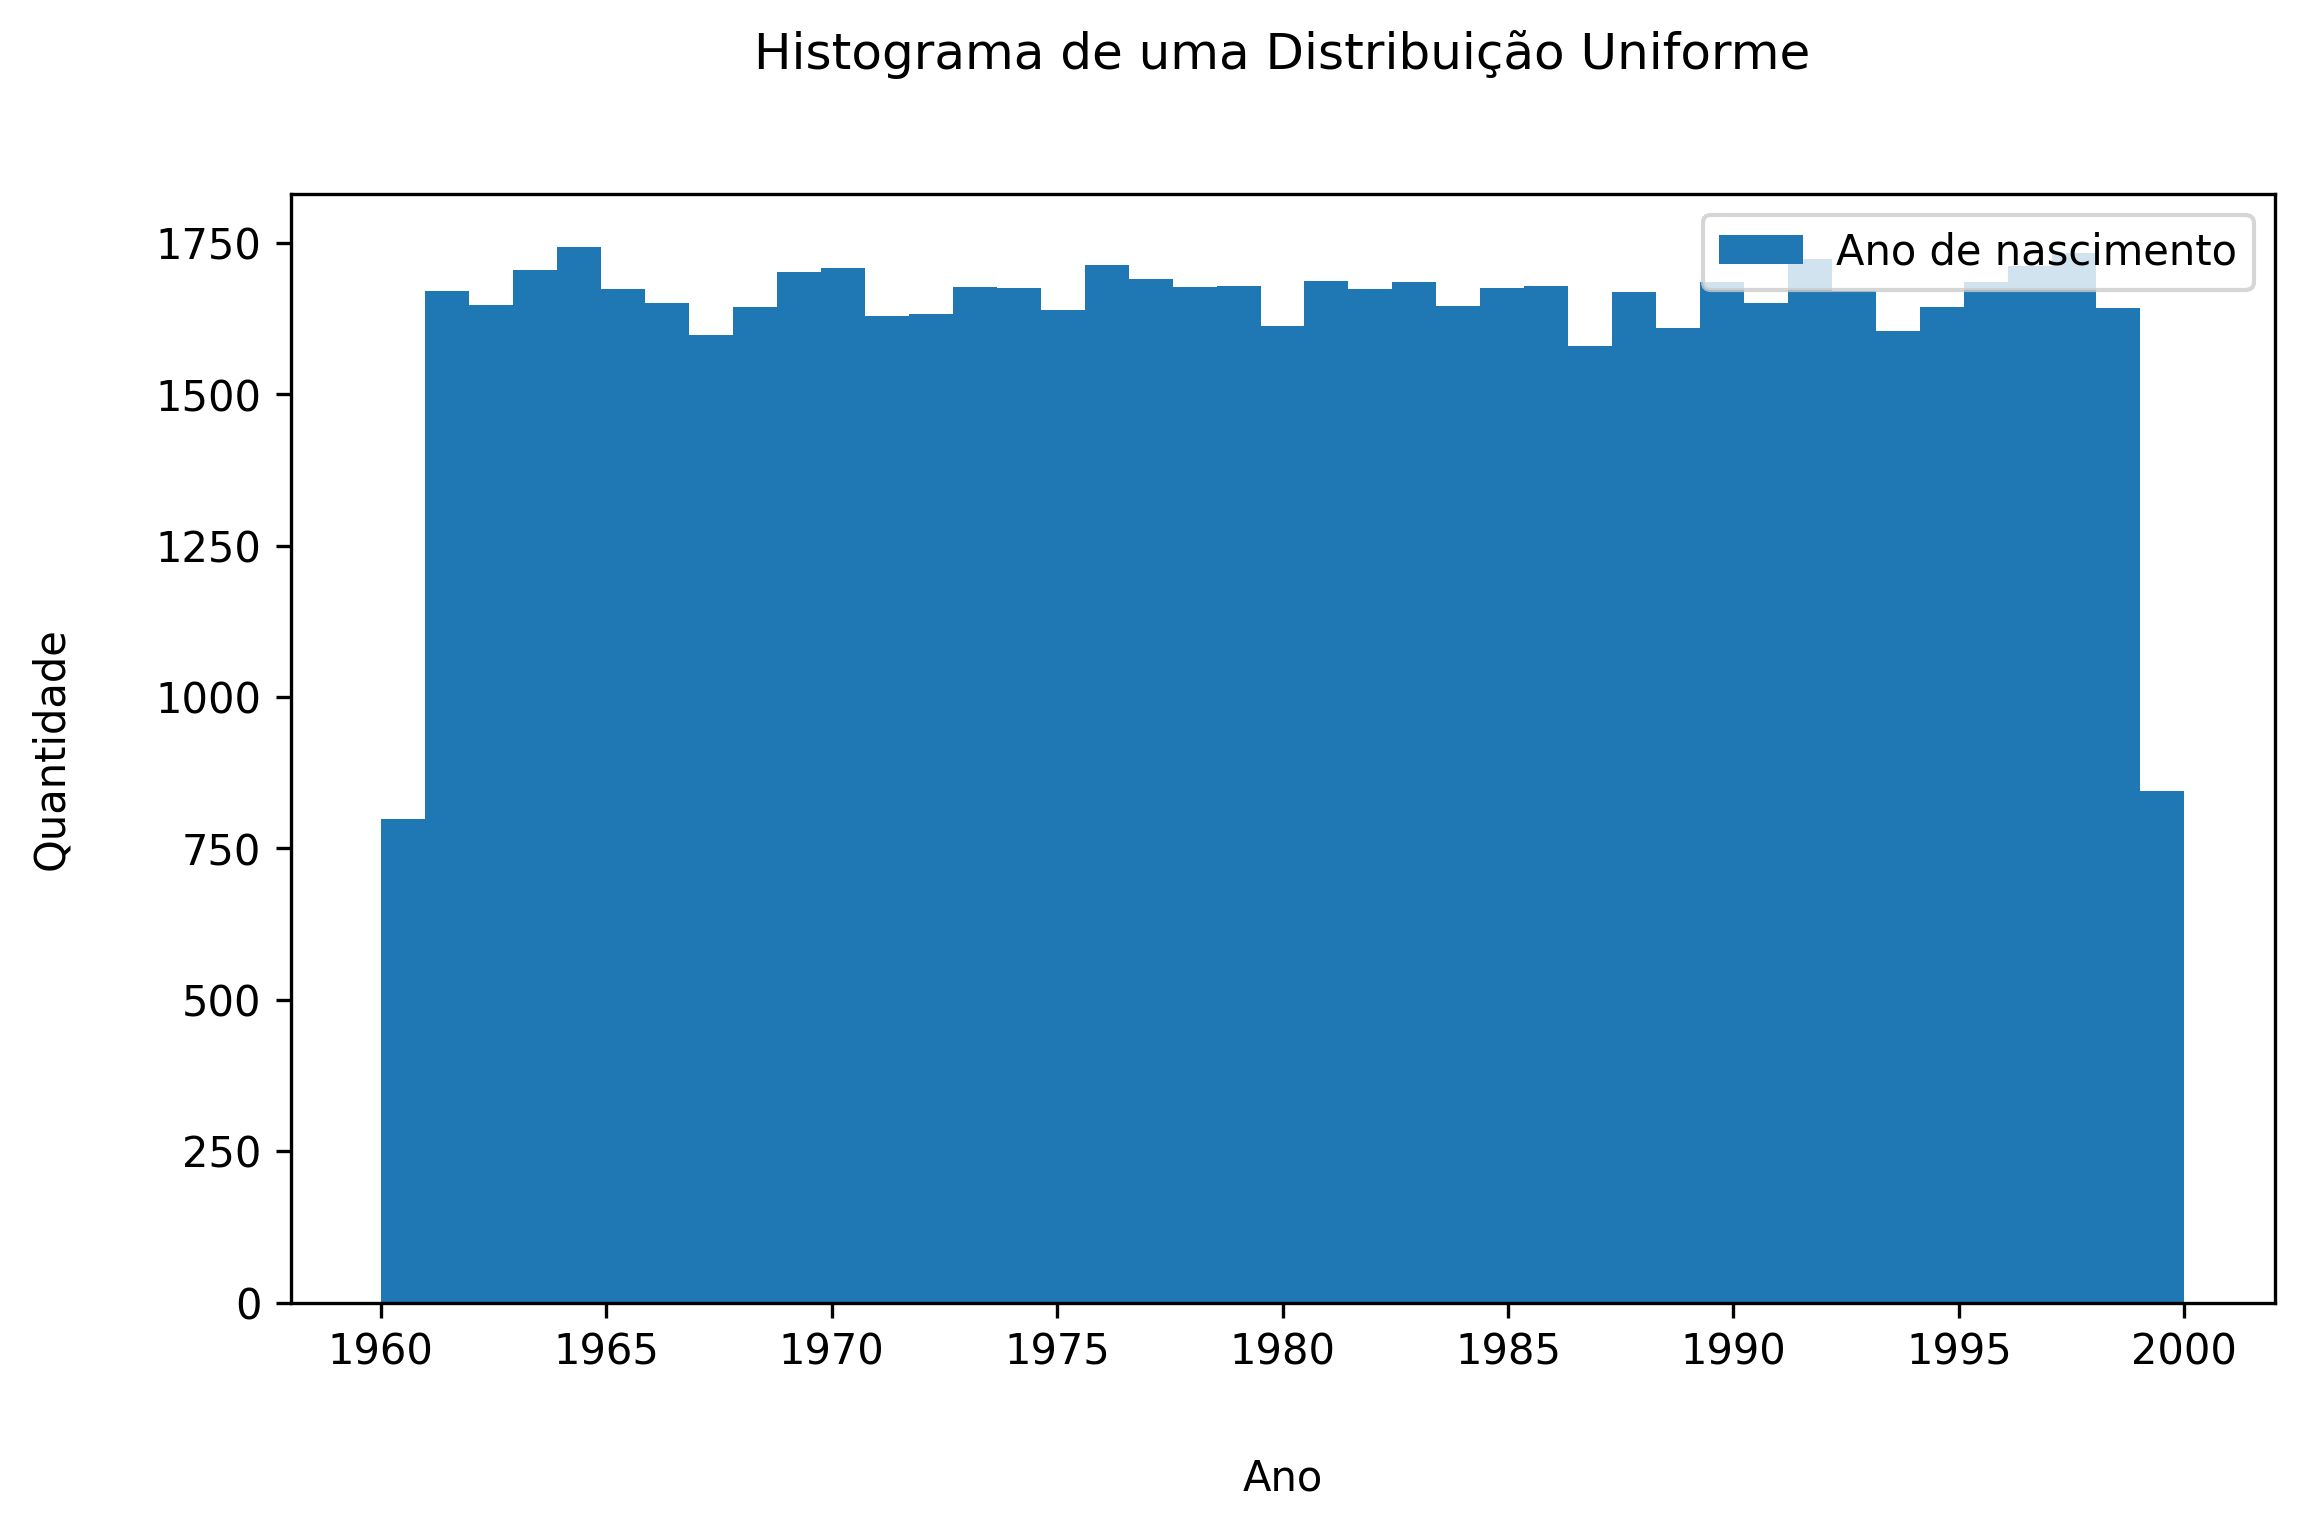

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

a = 1960
b = 2000
years = np.arange(a, b+1)
data = uniform.rvs(size=66666, loc=a, scale=b-a)
data = np.round(data)
w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
ax.hist(data, bins=len(years), label='Ano de nascimento')
ax.set_title('Histograma de uma Distribuição Uniforme', pad=30)
ax.set_xlabel('Ano', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)
ax.legend(loc='upper right')
plt.show()
fig.savefig('uniform_hist.png', dpi=1000, transparent=True, bbox_inches="tight")

## Distribuição Alfa

$$
f(x,\alpha)=\frac{1}{x^2\phi(\alpha)\sqrt{2\pi}}*\exp\left(-\frac{1}{2}(\alpha-1/x)^2\right)
$$

Quê?

Calma. O que você precisa saber: essa distribuição tem um "pico" no seu início. O tamanho desse pico comparado com o restante da distribuição é determinado pelo parâmetro alfa $(\alpha)$. Vamos experimentar alguns valores diferentes.

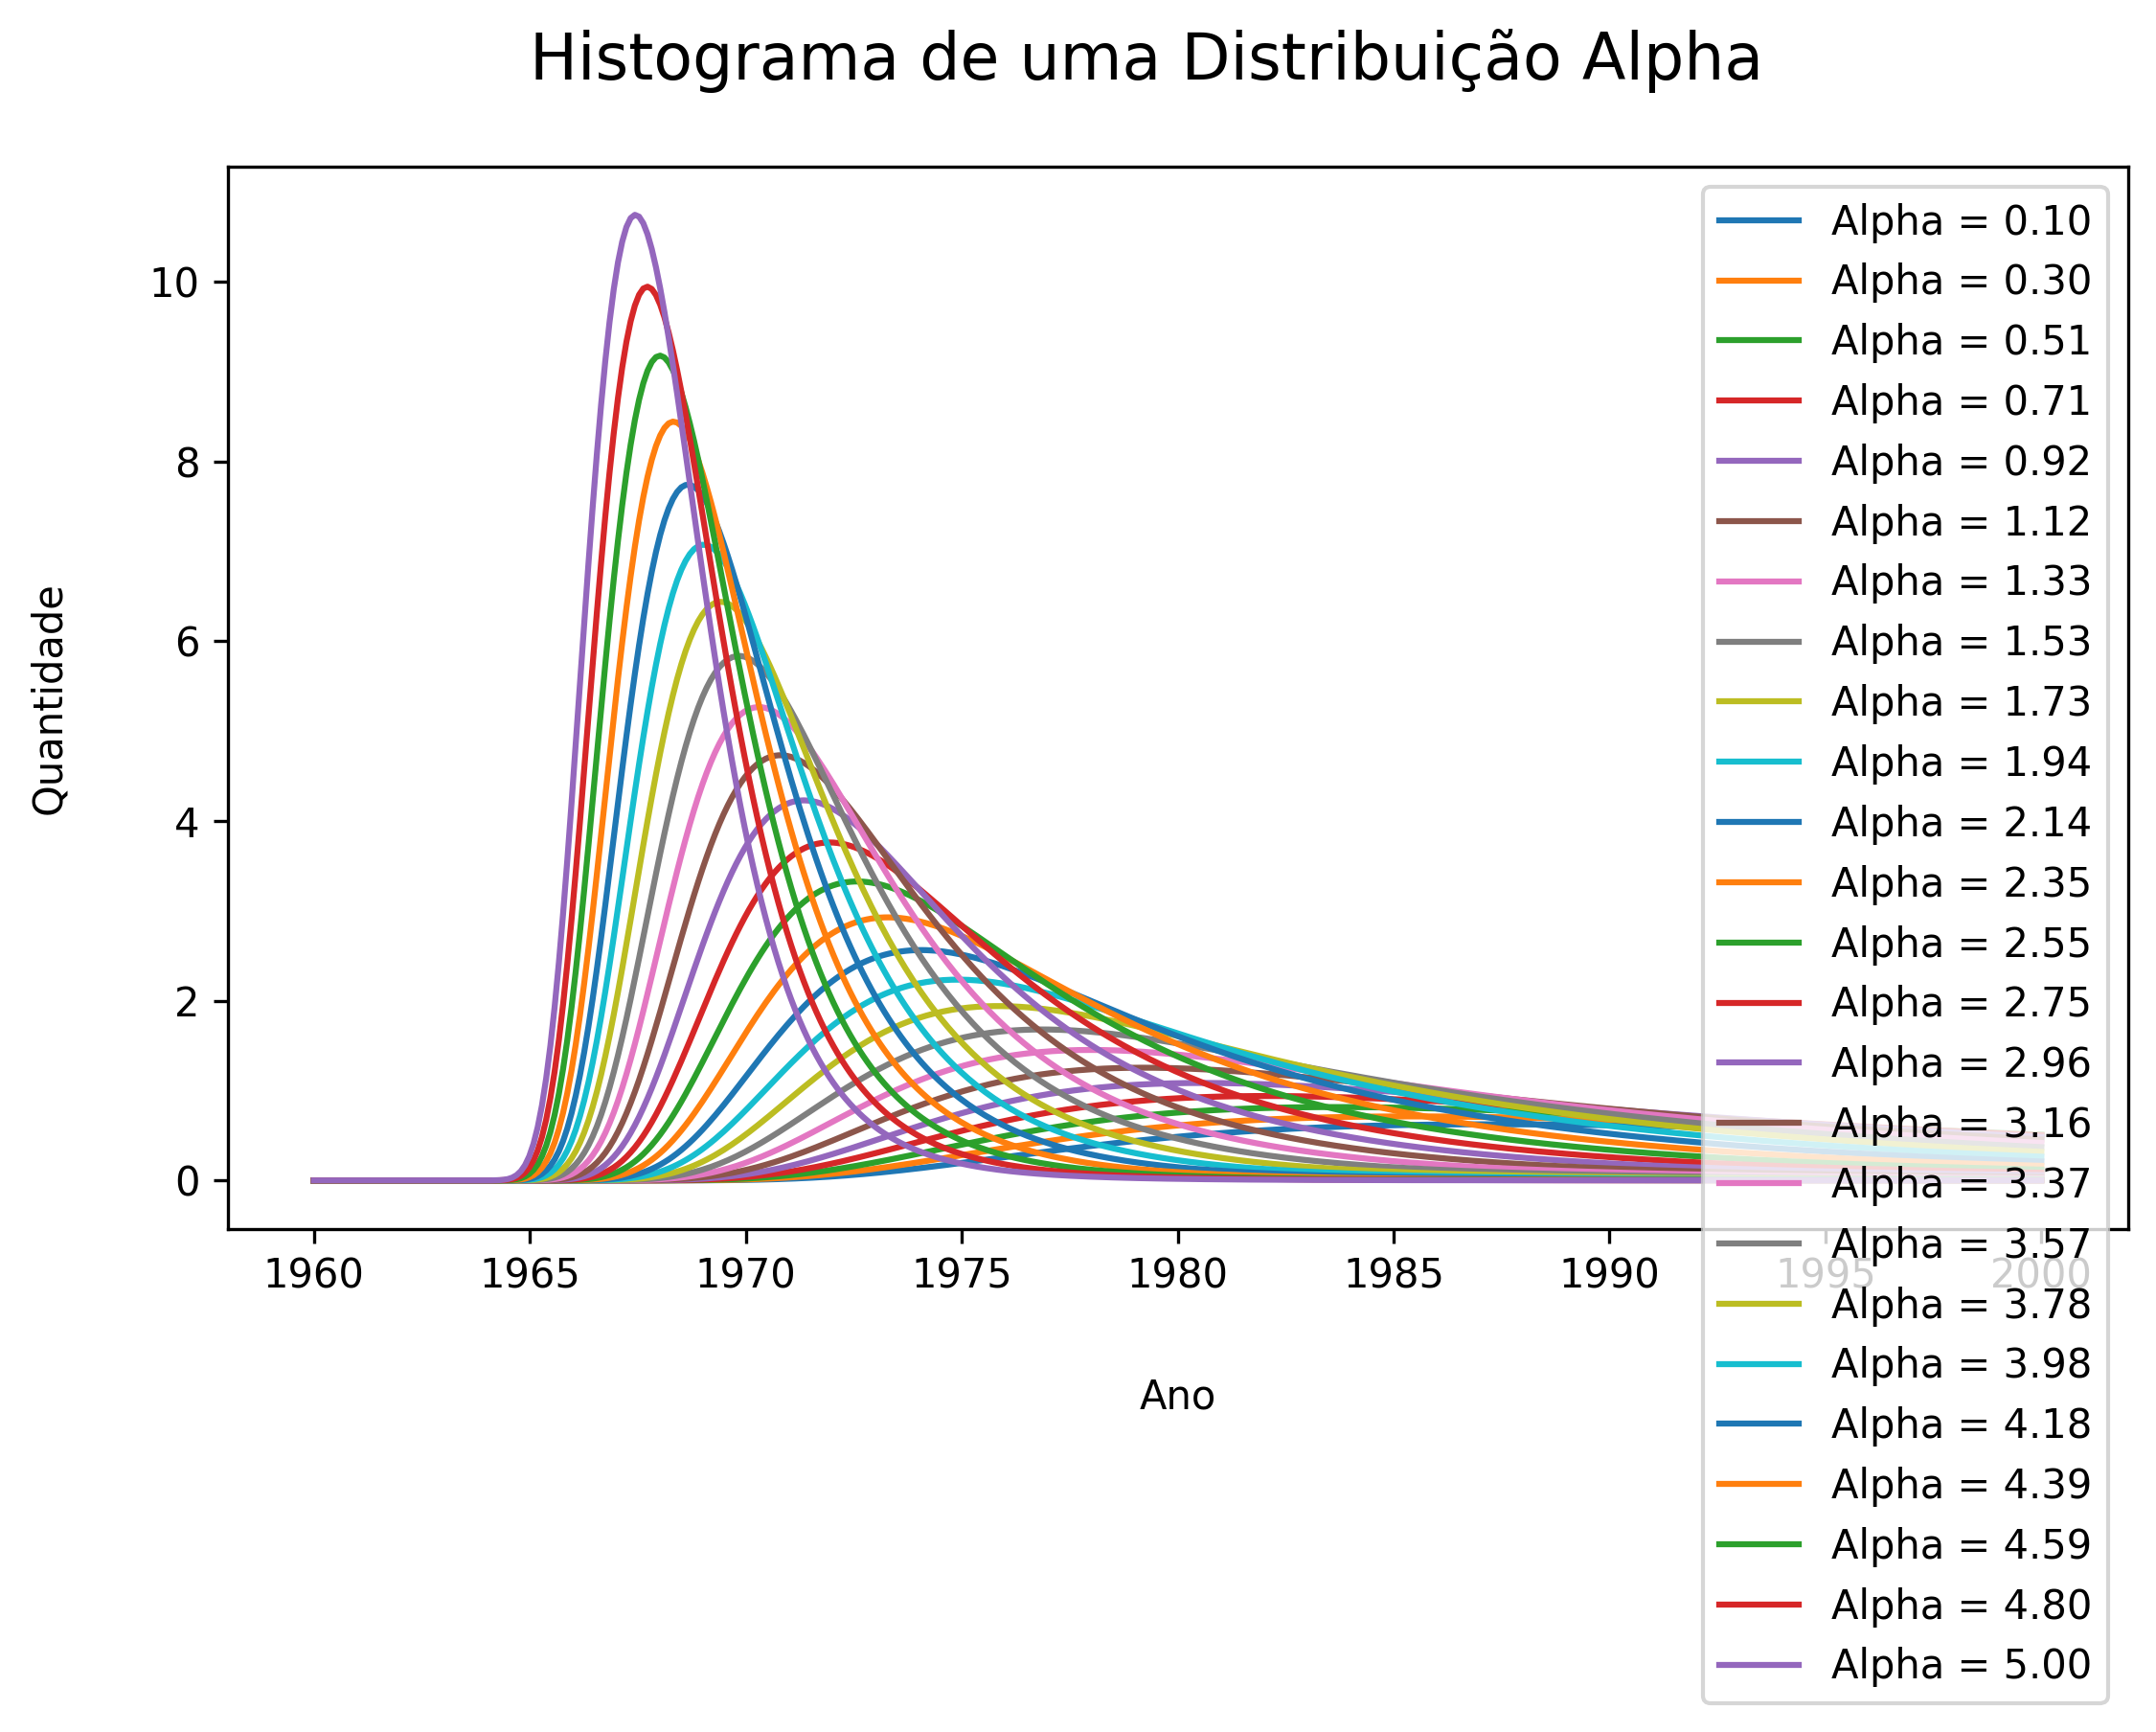

In [26]:
from scipy.stats import alpha

alphas = np.linspace(0.1, 5., 25)
x = np.linspace(0, 1, len(years) * 10)
years_smooth = np.linspace(1960, 2000, len(years) * 10)
w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
fig.suptitle('Histograma de uma Distribuição Alpha', fontsize=16)
ax.set_xlabel('Ano', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)
for k, a in enumerate(alphas):
    weights = alpha.pdf(x, a)
    alpha_formatted = "{:.2f}".format(a)
    ax.plot(years_smooth, weights, label=f'Alpha = {alpha_formatted}')
    ax.legend(loc='upper right')
plt.savefig('alpha.png', dpi=1000, transparent=True, bbox_inches="tight")

## Distribuição Exponencial

$$
f(x)=\exp(-x)
$$

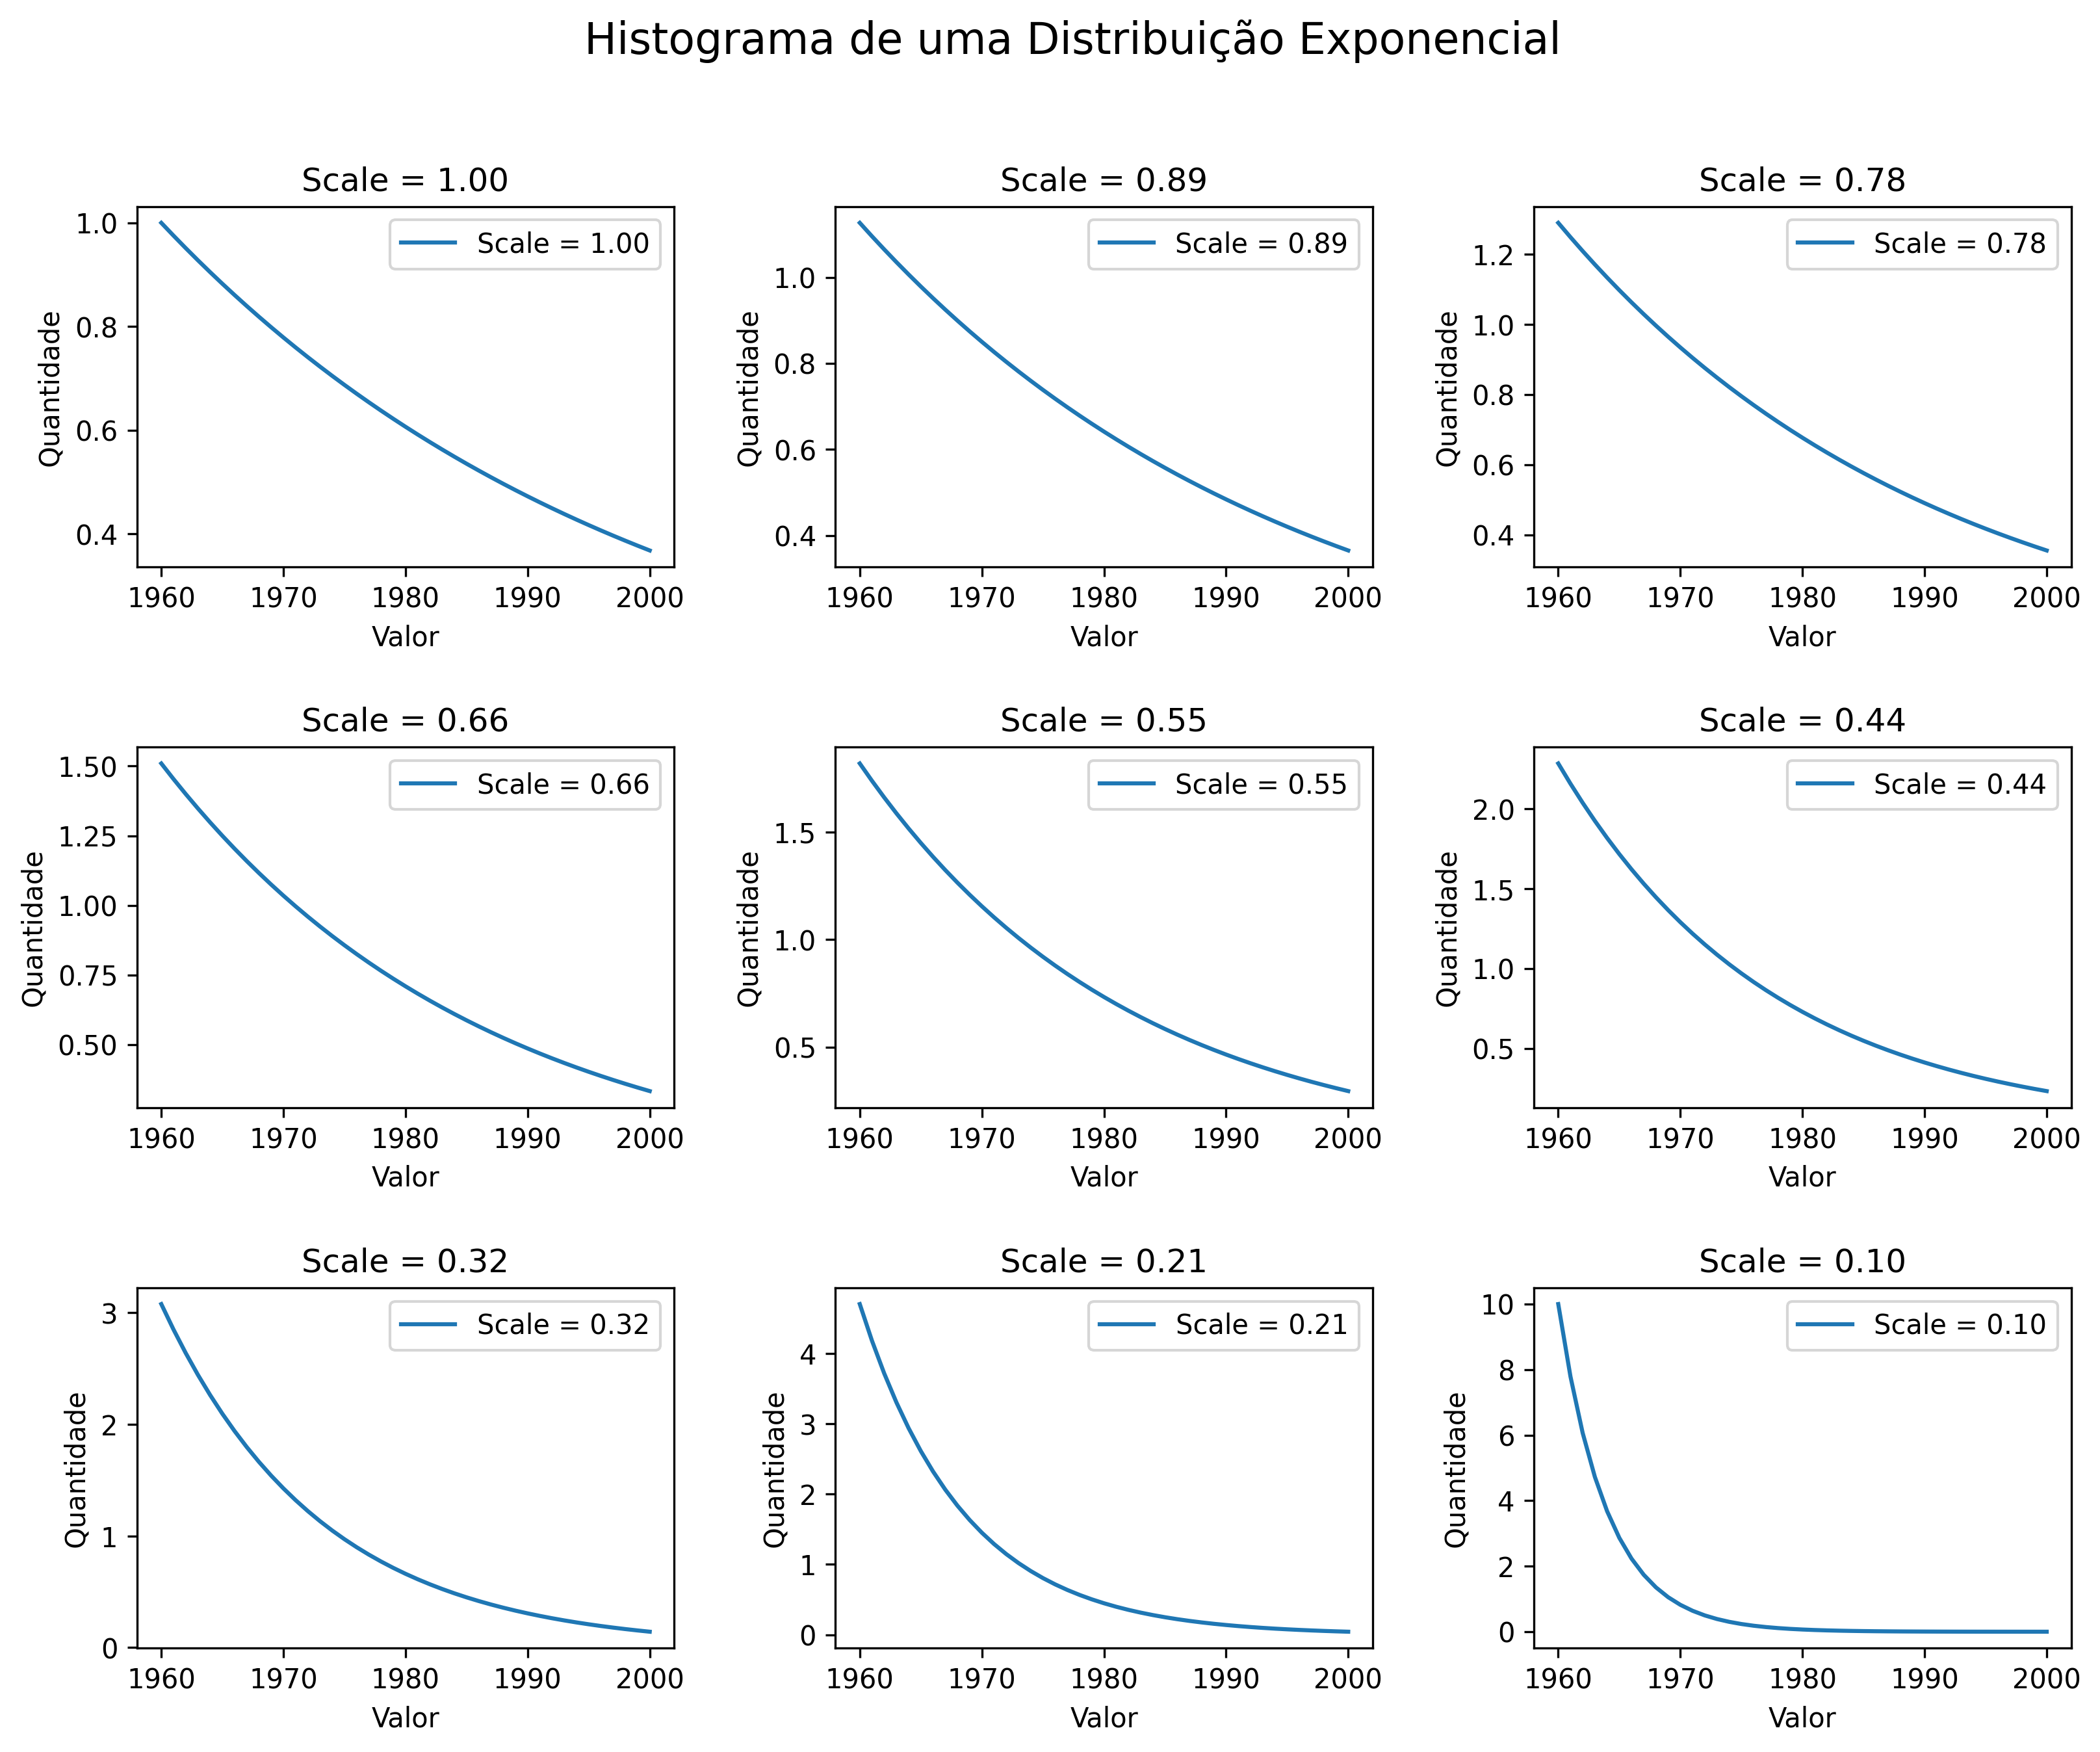

In [19]:
from scipy.stats import expon

scales = np.linspace(1, 0.1, 9)
fig, ax = plt.subplots(3, 3, figsize=(w * 1.5,h * 2))
fig.suptitle('Histograma de uma Distribuição Exponencial', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for k, scale in enumerate(scales):
    weights = expon.pdf(x, loc=0, scale=scale)
    i = k // 3
    j = k % 3
    scale_formatted = "{:.2f}".format(scale)
    ax[i, j].plot(years, weights, label=f'Scale = {scale_formatted}')
    ax[i, j].set_title(f'Scale = {scale_formatted}')
    ax[i, j].set_xlabel('Valor')
    ax[i, j].set_ylabel('Quantidade')
    ax[i, j].legend(loc='upper right')
plt.show()
fig.savefig('expon.png', dpi=1000, transparent=True, bbox_inches="tight")

Quando forçamos que a curva tenha sua escala alterada, também mudamos seu formato. Note que o valor do pico também é alterado.